# Curve Fitting & Bias/Variance tradeoff

In this notebook, you will explore the concept of curve fitting in machine learning. Curve fitting involves modeling a relationship between input features and target variables using polynomial regression. By examining how the model's complexity affects its performance, you will gain insight into key concepts such as underfitting, overfitting, and the bias-variance tradeoff.

---

## Exercise 1: Synthetic Dataset

In this notebook we will be using a generated simple dataset. The generation code is provided in the cell below. 

Try to understand what is does and plot the data as well as the theoretical function it's coming from.


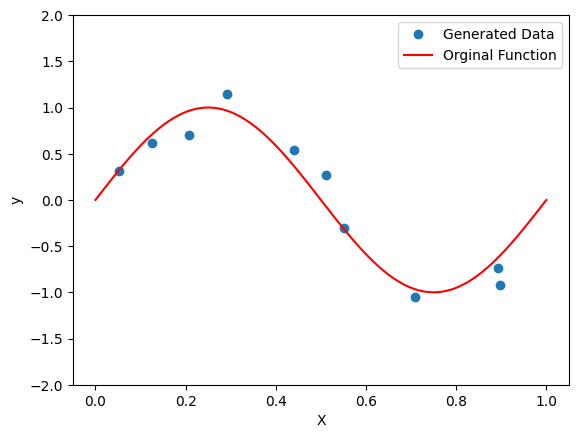

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seed = 3
np.random.seed(seed=seed)

# Generate synthetic dataset
N = 10
X = np.sort(np.random.uniform(0, 1, N,))
y = np.sin(2 * np.pi * X) + np.random.randn(N) * 0.2

# Plot the data and the orginal function
X_plot = np.linspace(0, 1, 100)
y_plot = np.sin(2 * np.pi * X_plot)

plt.plot(X, y, 'o', label="Generated Data")
plt.plot(X_plot, y_plot, c='r', label="Orginal Function")
plt.ylim(-2, 2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Exercise 2: Manual Polynomial Regression

Use the `polyfit()` function from numpy to obtain the coefficients and fit a polynomial regression curve.
1. Use the generated data to get the polynomial coefficients of a degree `3` fit. Print them and reflect on what they represent.
2. Apply these coefficients to get the fitting function. Pay attention to the coefficient order.
3. Redrow the plot above adding the fitted curve.

Polynomial coefficients : [ 23.03343275 -36.11859374  13.41176721  -0.43917791]


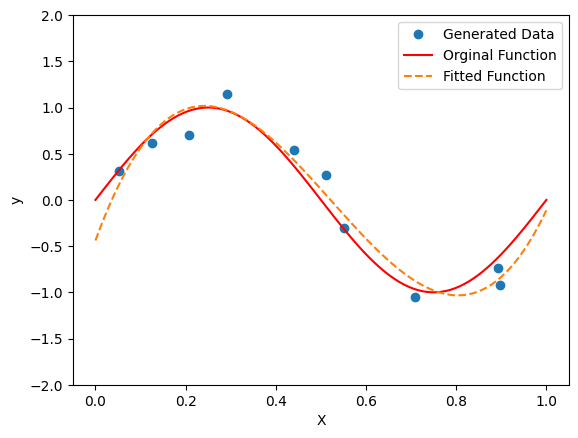

In [2]:
# Get the polynomial coefficients
coeffs = np.polyfit(X, y, 3)
print('Polynomial coefficients :', coeffs)

# Apply the coefficients
y_poly3 = coeffs[3] + coeffs[2]*X_plot + coeffs[1]*(X_plot**2) + coeffs[0]*(X_plot**3)

# Plot the results
plt.plot(X, y, 'o', label="Generated Data")
plt.plot(X_plot, y_plot, c='r', label="Orginal Function")
plt.plot(X_plot, y_poly3, '--', label="Fitted Function")
plt.ylim(-2, 2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Exercise 3: Multiple degrees

Do the same as before using degrees ranging from 1 to 9. Use the `np.poly1d()` function so you don't have to write the fitting function.

Plot all the results using subplots inside the loop.

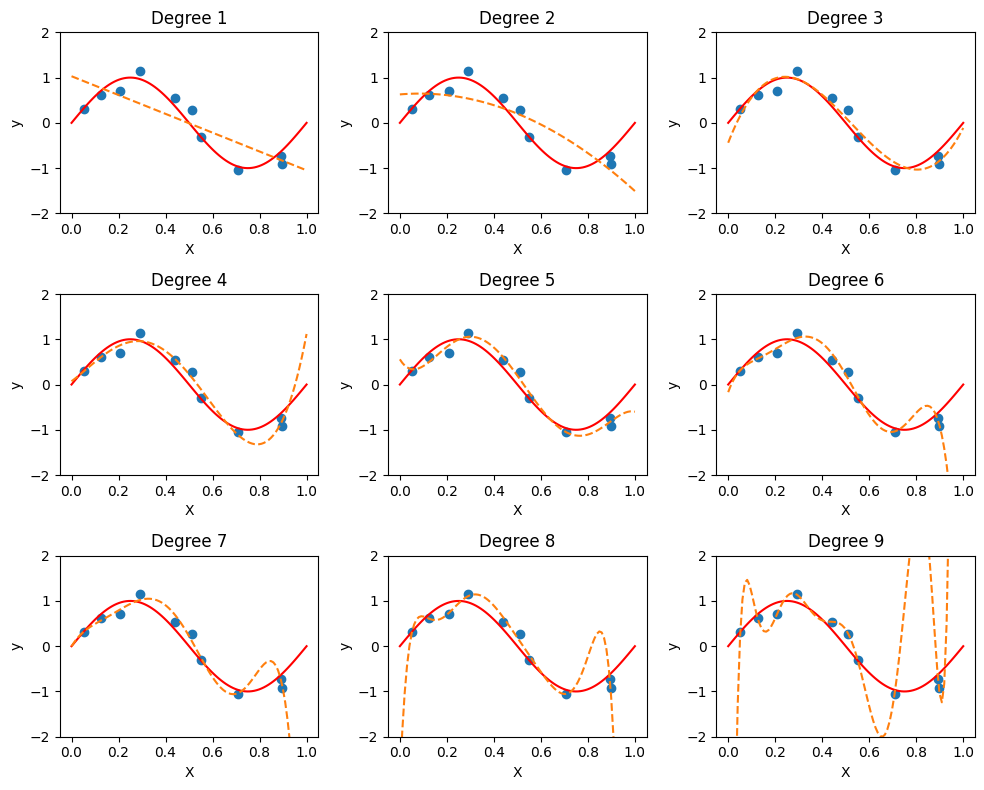

In [3]:
degrees = range(1, 10)

plt.figure(figsize=(10, 8))

for i, d in enumerate(degrees):
    # Fit polynomial regression model
    coeffs = np.polyfit(X, y, d)
    model = np.poly1d(coeffs)
    y_poly = model(X_plot)

    # Plot the results using subplots
    plt.subplot(3, 3, i+1)
    plt.plot(X, y, 'o', label="Generated Data")
    plt.plot(X_plot, y_plot, c='r', label="Orginal Function")
    plt.plot(X_plot, y_poly, '--', label="Fitted Function")
    plt.ylim(-2, 2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f'Degree {d}')

plt.tight_layout()
plt.show()
    

## Exercise 4: Regressions errors

Split the dataset into training and testing (80-20) and fit the some polynomials (i.e. `d = 1` to `d = 9`).

Compute the training and validation errors for each degree and plot the training and validation errors as `d` increases.

C:\Users\HuguesVinzant\AppData\Local\Temp\ipykernel_23616\1136166670.py:12: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, d)
C:\Users\HuguesVinzant\AppData\Local\Temp\ipykernel_23616\1136166670.py:12: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, y_train, d)


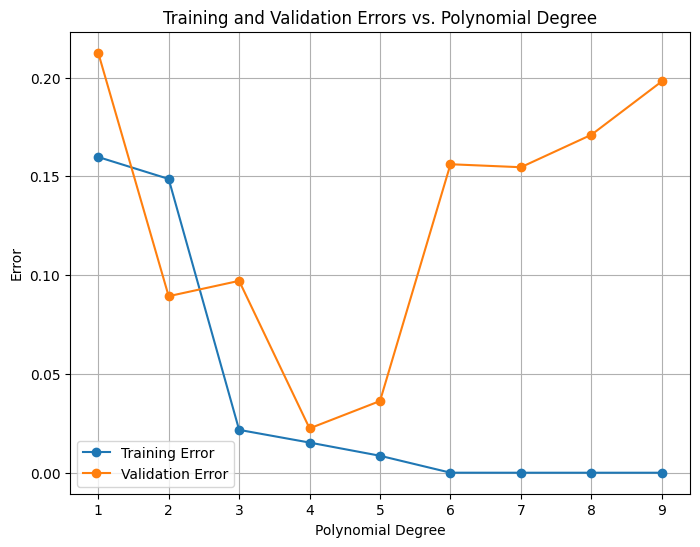

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

training_errors = []
validation_errors = []

for d in degrees:
    # Fit polynomial regression model
    coeffs = np.polyfit(X_train, y_train, d)
    model = np.poly1d(coeffs)

    # Compute training error
    y_train_pred = model(X_train)
    training_errors.append(mse(y_train, y_train_pred))

    # Compute validation error
    y_val_pred = model(X_val)
    validation_errors.append(mse(y_val, y_val_pred))

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(degrees, training_errors, marker='o', label='Training Error')
plt.plot(degrees, validation_errors, marker='o', label='Validation Error')
plt.title('Training and Validation Errors vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

## Exercise 5: More data

Try adding more data by changing the `N` in the first cell, what happens? 

## Exercise 6: Over and underfitting

Let's create a quadratic dataset with 20 points and plot it.

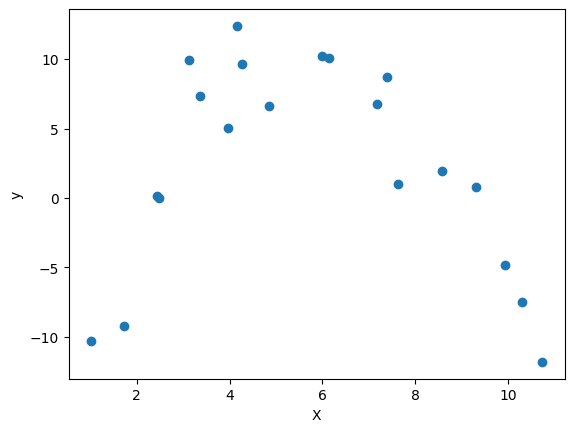

In [5]:
# Synthetic dataset
N = 20
X = np.sort(np.random.uniform(0, 11, N))
y = (-X+2) * (X-9) + np.random.normal(0, 3, N)

# Plotting
plt.plot(X, y, 'o')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Now fit three polynomes of degrees 1, 2 and 15 and plot them on the same plot. Which one is a under fit, a good fit or a overfit?

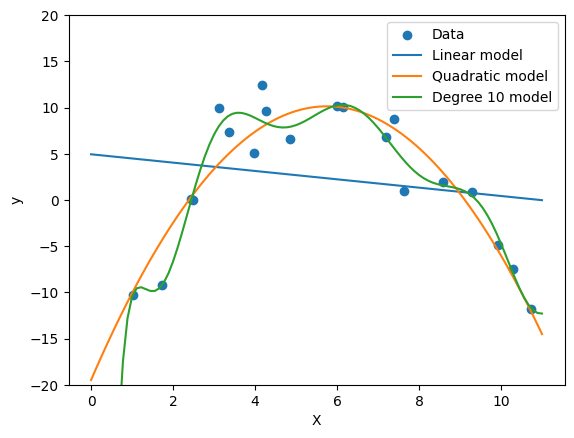

In [6]:
X_plot = np.linspace(0,11,100)

# Linear fit
lin_fit = np.polyfit(X, y, 1)
lin_val = np.polyval(lin_fit, X_plot)

# Degree 2 fit
two_fit = np.polyfit(X, y, 2)
two_val = np.polyval(two_fit, X_plot)

# Degree 10 fit
ten_fit = np.polyfit(X, y, 10)
ten_val = np.polyval(ten_fit, X_plot)

plt.scatter(X, y, label='Data')
plt.plot(X_plot, lin_val, label='Linear model')
plt.plot(X_plot, two_val, label='Quadratic model')
plt.plot(X_plot, ten_val, label='Degree 10 model')
plt.xlabel("X")
plt.ylabel("y")
plt.ylim([-20, 20])
plt.legend()
plt.show()

## Exercise 7: Bias/Variance tradeoff

For the three models above compute the bias (mean squared error on training data) and the variance (variance of predication). 
Use stacked barplots of the bias and variance to display the results or print the idividual values and the sum of the two.

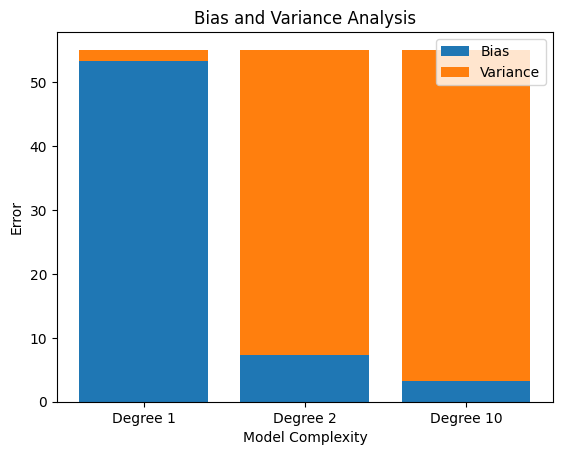

In [9]:
# Compute bias and variance for each degree
def get_bias_variance(fit, X, y):
    preds = np.polyval(fit, X)
    bias = np.mean((y - preds) ** 2)
    variance = np.var(preds)
    return bias, variance

lin_bias, lin_var = get_bias_variance(lin_fit, X, y)
two_bias, two_var = get_bias_variance(two_fit, X, y)
ten_bias, ten_var = get_bias_variance(ten_fit, X, y)

biases = [lin_bias, two_bias, ten_bias]
variances = [lin_var, two_var, ten_var]

# Plot bias and variance
plt.bar(["Degree 1", "Degree 2", "Degree 10"], biases, label="Bias")
plt.bar(["Degree 1", "Degree 2", "Degree 10"], variances, label="Variance", bottom=biases)
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.title("Bias and Variance Analysis")
plt.legend()
plt.show()